In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# load the dataset
df = pd.read_csv("Heart.csv")

In [54]:
# a] find shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (303, 15)


In [7]:
# b] Find data type of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


In [10]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [55]:
# c] Missing values & replace them
print(df.isnull().sum())

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [56]:
''' missing values are 
Ca            4 --> numeric
Thal          2 --> categorical
'''
#for numeric we use mean to fill thoose vvalues
mean_Ca= df['Ca'].mean()
df['Ca'].fillna(mean_Ca, inplace=True)


#for categorical we use mode 
mode_Thal = df['Thal'].mode()[0]
df['Thal'].fillna(mode_Thal, inplace=True)

C:\Users\viren\AppData\Local\Temp\ipykernel_14716\356036330.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca'].fillna(mean_Ca, inplace=True)
C:\Users\viren\AppData\Local\Temp\ipykernel_14716\356036330.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [15]:
#now lets check again
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


In [16]:
#no missing/null values now

In [17]:
#d] remove incosistency
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [18]:
df.duplicated().sum()

0

In [21]:
#no duplicates and numerical data also looks fine
#now lets check the categorical data
print("value counts of Thal")
print(df['Thal'].value_counts())
print("value counts of AHD")
print(df['AHD'].value_counts())

value counts of Thal
Thal
normal        168
reversable    117
fixed          18
Name: count, dtype: int64
value counts of AHD
AHD
No     164
Yes    139
Name: count, dtype: int64


In [25]:
#there is no incosictency in this 
#not even in ccase or worng name if it was there i should have appeard in the value counts 
#so dataset is already consistent
#just one thing we have to do is to  drop unanamed col which is just an id of patient which is not required currently or we can rename it to id
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [31]:
# e] Find out zeros in numeric columns
numeric_cols = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR','ExAng', 'Oldpeak', 'Slope', 'Ca']
#we didnt considered id here

print((df[numeric_cols] == 0).sum())

Age          0
Sex         97
RestBP       0
Chol         0
Fbs        258
RestECG    151
MaxHR        0
ExAng      204
Oldpeak     99
Slope        0
Ca         176
dtype: int64


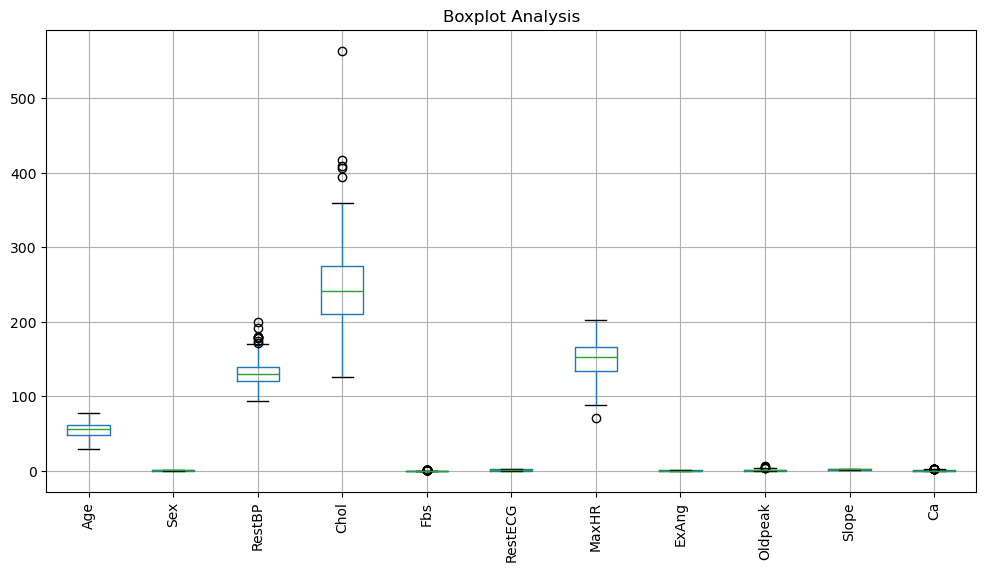

In [33]:
# f] Boxplot analysis
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot Analysis")
plt.xticks(rotation=90)
plt.show()

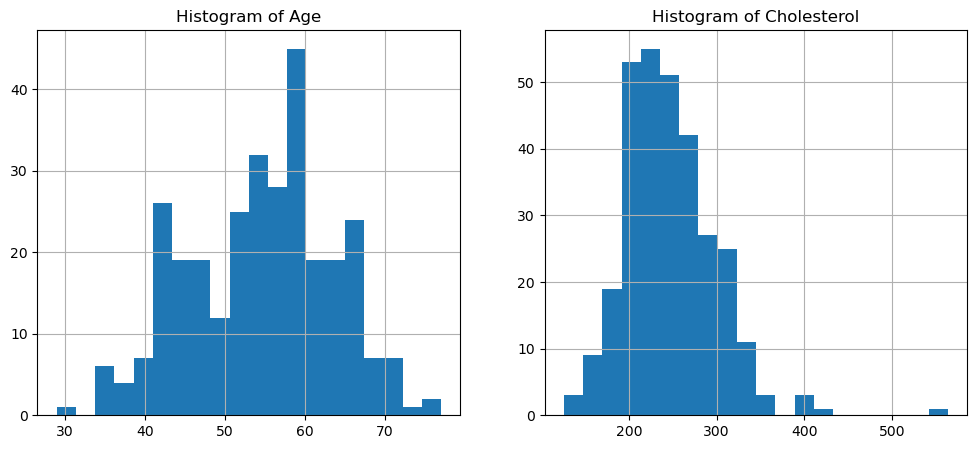

In [38]:
# g] Draw histogram of any two attributes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Age'].hist(bins=20)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
df['Chol'].hist(bins=20)
plt.title('Histogram of Cholesterol')
plt.show()

In [41]:
# h] Find mean age of patients
mean_age = df['Age'].mean()
print("Mean age of patients:", mean_age)

Mean age of patients: 54.43894389438944


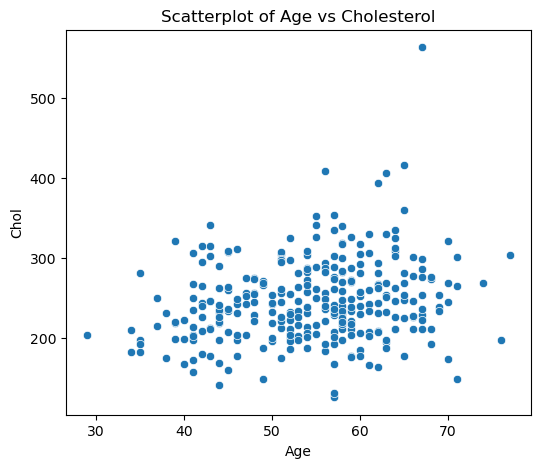

In [44]:
# i] plot Scatterplot
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Age', y='Chol')
plt.title("Scatterplot of Age vs Cholesterol")
plt.show()

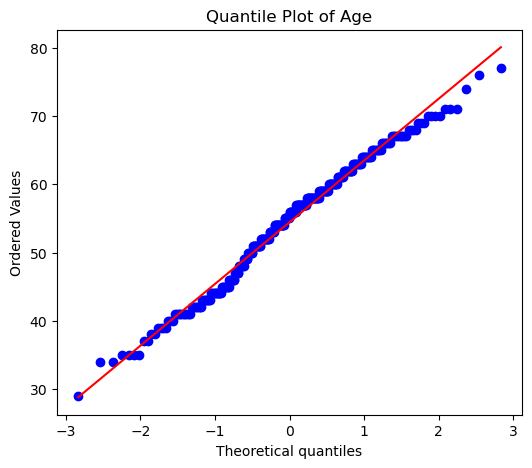

In [51]:
# j] Quantile plot of suitable attributes
import scipy.stats as stats
plt.figure(figsize=(6, 5))
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title("Quantile Plot of Age")
plt.show()